In [ ]:
import os
from google.colab import drive

# This allows us to pull data directly from our shared drive to this notebook
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from pathlib import Path
import nibabel as nib
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ADNI/idaSearch_3_26_2022_APOE.csv')
labels

,Subject ID,Sex,Research Group,APOE A1,APOE A2,Age,Modality,Description,Image ID
0,002_S_0295,M,CN,3,4,84.9,MRI,B1-Calibration Body,13710
1,002_S_0295,M,CN,3,4,84.9,MRI,B1-Calibration PA,13711
2,002_S_0295,M,CN,3,4,84.9,MRI,3-plane localizer,13712
3,002_S_0295,M,CN,3,4,84.9,MRI,3-plane localizer,13713
4,002_S_0295,M,CN,3,4,84.9,MRI,3-plane localizer,13714
...,...,...,...,...,...,...,...,...,...
39431,941_S_1363,F,MCI,3,4,69.8,MRI,MPRAGE,44495
39432,941_S_1363,F,MCI,3,4,69.8,MRI,MPRAGE Repeat,44496
39433,941_S_1363,F,MCI,3,4,69.8,MRI,Localizer,44497
39434,941_S_1363,F,MCI,3,4,69.8,MRI,Localizer,44498


In [ ]:
ROOT_PATH = "/content/drive/My Drive/FreeSurfer_data/AD/"
SAVE_PATH = Path("/content/drive/My Drive/FreeSurfer_data/")

In [ ]:
all_scan_paths = [
    os.path.join(os.getcwd(), ROOT_PATH, x)
    for x in os.listdir(ROOT_PATH)]

print(len(all_scan_paths))

10


In [ ]:
list_of_files = []
for i in range(len(all_scan_paths)):
  a = all_scan_paths[i][-25:-15]
  #a = all_scan_paths[i][-14:-4]
  list_of_files.append(a)

#list_of_files = list_of_files[0:-3]
print(len(list_of_files))
print(list_of_files)


10
['027_S_0850', '032_S_1101', '032_S_0400', '027_S_1081', '032_S_0147', '033_S_0724', '007_S_0316', '031_S_1209', '031_S_0554', '005_S_1341']


In [ ]:
#Selecting labels for files in our dataset
labels = labels.drop_duplicates(subset = ['Subject ID'])
labels = labels[labels['Subject ID'].isin(list_of_files)]
labels = labels.rename(columns={"Subject ID": "Subject", "Research Group":"Group"})
labels

,Subject,Sex,Group,APOE A1,APOE A2,Age,Modality,Description,Image ID
2438,005_S_1341,F,AD,3,4,71.7,MRI,B1-Calibration PA,43182
3263,007_S_0316,M,AD,4,4,80.9,MRI,3-plane localizer,12614
13156,027_S_0850,M,AD,3,4,78.2,MRI,B1-Calibration Body,23838
13270,027_S_1081,M,AD,3,4,84.6,MRI,B1-Calibration Body,37139
14625,031_S_0554,M,AD,3,4,71.7,MRI,"Head,3-P,2D,LOCALIZER",15991
15116,031_S_1209,F,AD,3,4,72.1,MRI,"Head,3-P,2D,LOCALIZER",36175
15201,032_S_0147,F,AD,3,3,59.8,MRI,ADNI Double/TSE,10403
15332,032_S_0400,M,AD,3,3,69.3,MRI,Double_TSE,13524
15601,032_S_1101,F,AD,3,4,71.0,MRI,Double_TSE,30289
16099,033_S_0724,M,AD,3,3,78.7,MRI,B1-Calibration PA,19765


In [ ]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

#AD slices

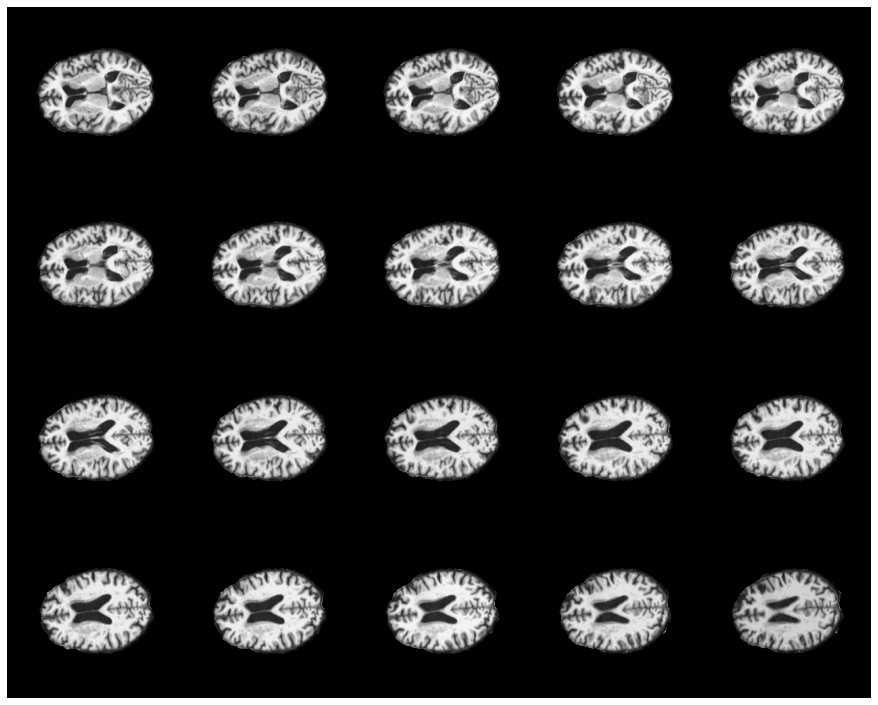

In [ ]:
#Slice 0
patient_id = labels.Subject.iloc[0]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[0]
image = nib.load(nii_path).get_fdata()[:,:,115:135, 0]

plot_slices(4, 5, 256, 256, image)

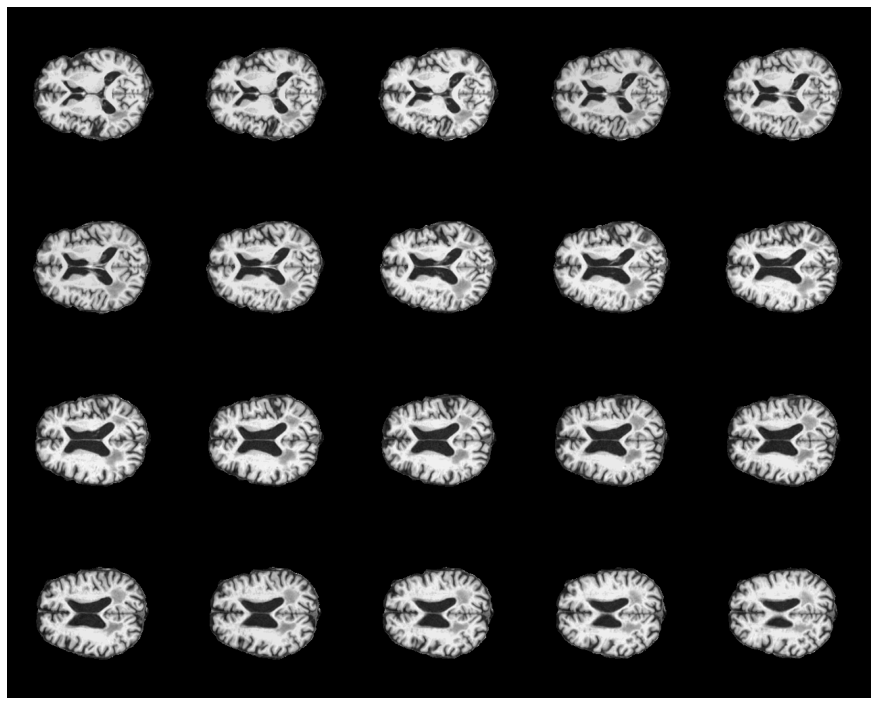

In [ ]:
#Slice 1
patient_id = labels.Subject.iloc[1]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[1]
image = nib.load(nii_path).get_fdata()[:,:,145:165, 0]

plot_slices(4, 5, 256, 256, image)

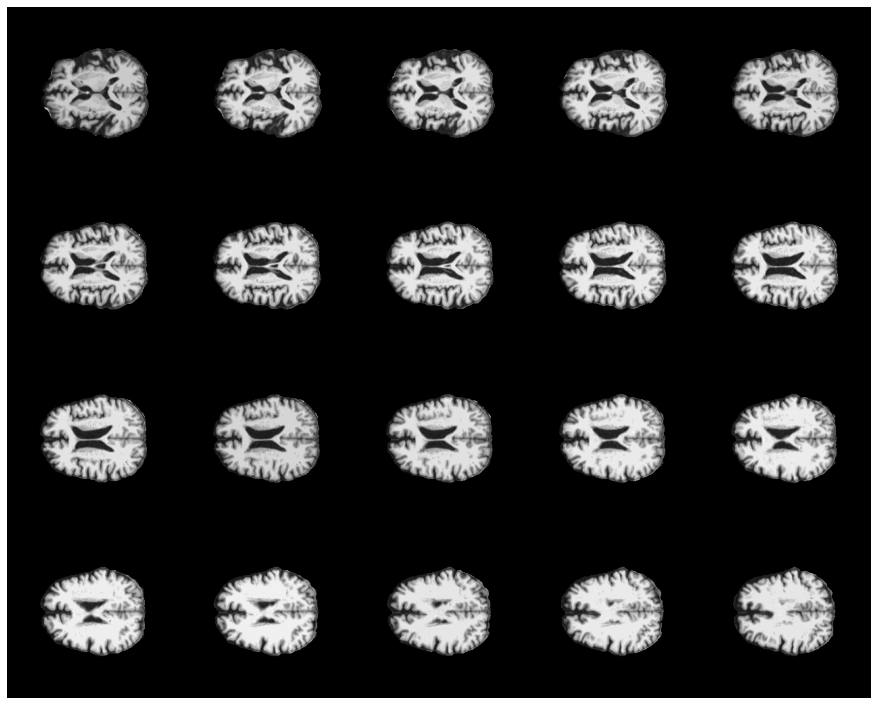

In [ ]:
#Slice 2
patient_id = labels.Subject.iloc[2]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[2]
image = nib.load(nii_path).get_fdata()[:,:,135:155, 0]

plot_slices(4, 5, 256, 256, image)

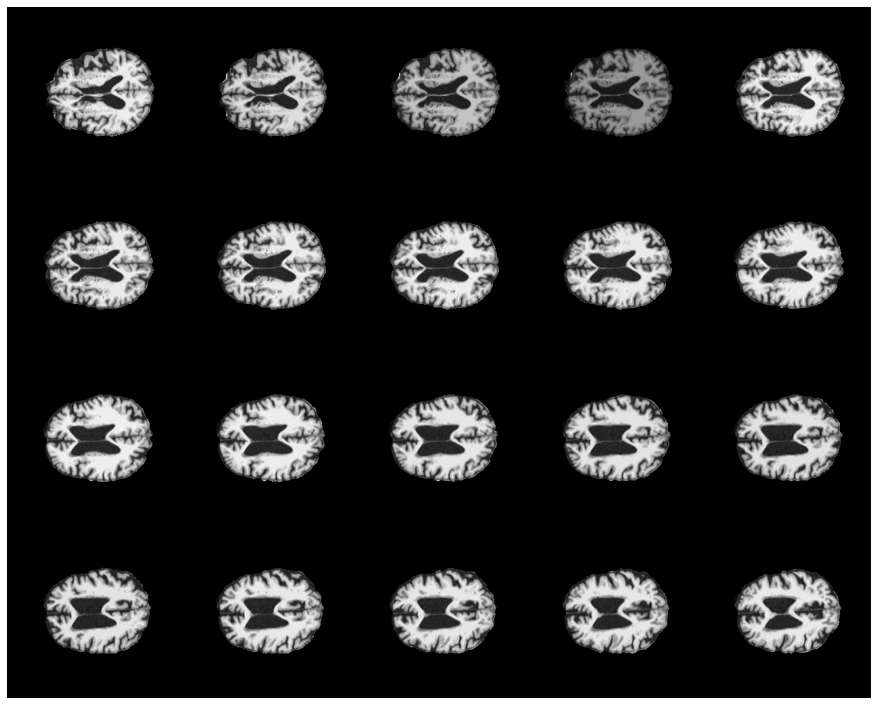

In [ ]:
#Slice 3
patient_id = labels.Subject.iloc[3]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[3]
image = nib.load(nii_path).get_fdata()[:,:,145:165, 0]

plot_slices(4, 5, 256, 256, image)

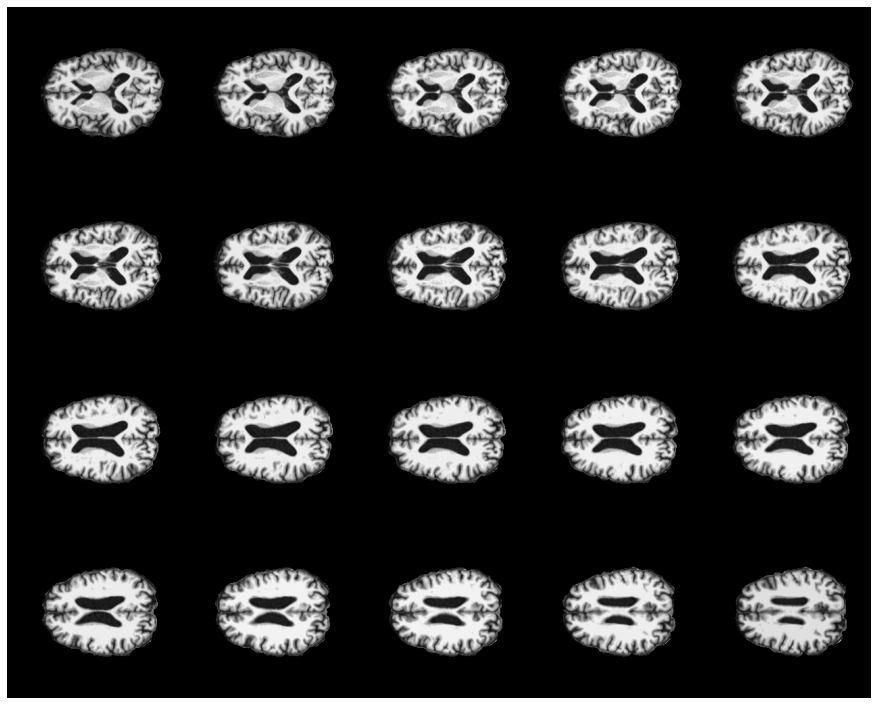

In [ ]:
#Slice 4
patient_id = labels.Subject.iloc[4]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[4]
image = nib.load(nii_path).get_fdata()[:,:,140:160, 0]

plot_slices(4, 5, 256, 256, image)

In [ ]:
#Slice 5
patient_id = labels.Subject.iloc[5]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[5]
image = nib.load(nii_path).get_fdata()[:,:,148:168, 0]

#plot_slices(4, 5, 256, 256, image)

In [ ]:
#Slice 6
patient_id = labels.Subject.iloc[6]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[6]
image = nib.load(nii_path).get_fdata()[:,:,150:170, 0]

#plot_slices(4, 5, 256, 256, image)

In [ ]:
#Slice 7
patient_id = labels.Subject.iloc[7]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[7]
image = nib.load(nii_path).get_fdata()[:,:,155:175, 0]

#plot_slices(4, 5, 256, 256, image)

In [ ]:
#Slice 8
patient_id = labels.Subject.iloc[8]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[8]
image = nib.load(nii_path).get_fdata()[:,:,145:165, 0]

#plot_slices(4, 5, 256, 256, image)

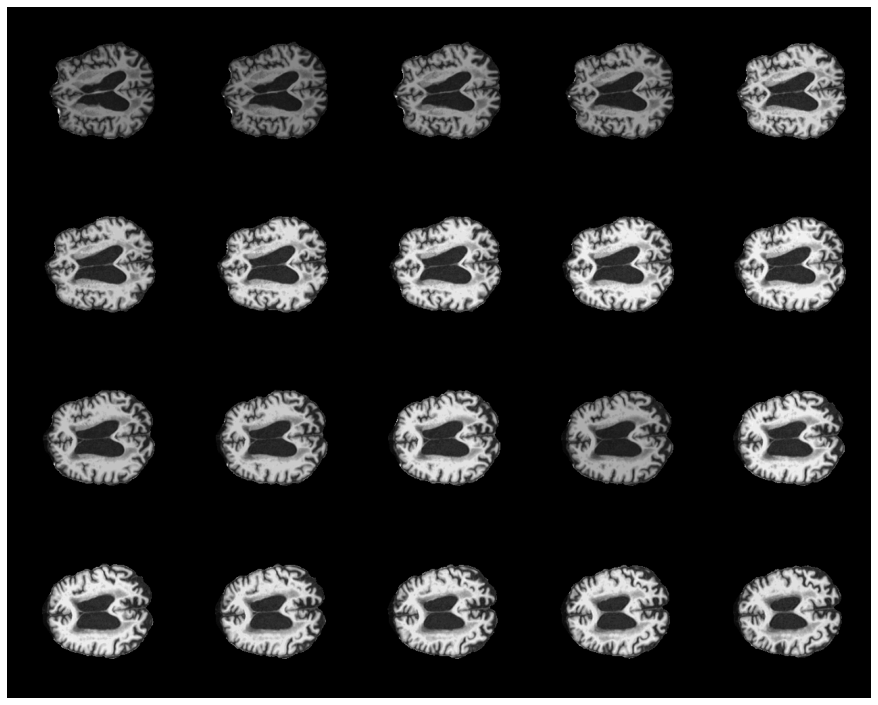

In [ ]:
#Slice 9
patient_id = labels.Subject.iloc[9]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
label = labels['Group'].iloc[9]
image = nib.load(nii_path).get_fdata()[:,:,155:175, 0]

#plot_slices(4, 5, 256, 256, image)

In [ ]:
#Saving AD slices
import matplotlib

patient_id = labels.Subject.iloc[9]
nii_path = ROOT_PATH + patient_id + "_FreeSurfer.nii"
#slices = list(np.arange(115, 135))
#slices = list(np.arange(145,165))
#slices = list(np.arange(135,155))
#slices = list(np.arange(145,165))
#slices = list(np.arange(140,160))
#slices = list(np.arange(148,168))
#slices = list(np.arange(150,170))
#slices = list(np.arange(155,175))
#slices = list(np.arange(145,165))
slices9 = list(np.arange(155,175))


for i in range(len(slices)):
  nii = nib.load(nii_path).get_fdata()[:,:,slices[i],0] / 255
  patient_id_new = patient_id + "_" + str(slices[i])
  nii_array = cv2.resize(nii, (224, 224)).astype(np.float16)
  label = labels['Group'].iloc[9]
  train_or_test = "processed/train"
  current_save_path = SAVE_PATH/train_or_test/str(label)
  current_save_path.mkdir(parents=True, exist_ok=True)
  matplotlib.image.imsave(str(current_save_path) + '/' + patient_id_new + '.jpg', nii_array, cmap='bone')